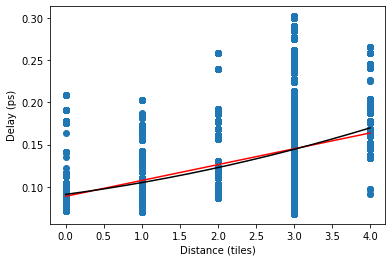

Slope: [[0.01874291]]
Y-intercept: [0.0888486]
RMSE: 0.057224455170783096
NRMSE, with respect to average: 0.4149068639060085


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import sklearn.metrics as skm

""" Assume T_delay=T_intrinsic+T_propgation and T_propagation=RC [1]. Assuming the wire scales linearly with distance 
    since R=PL/A and we assume C is constant (It's not). C=C_intrinsic+C_interconnection+C_fanout, C_interconnection=C_wire+C_between_wires+C_fringe.
    C_fringe can be ingored, both the other terms scale linearly with L [2][3].
    The relationship is modeled linearly and RSME is calculated and compared with assuming the expected value is contant (mean of the population)
    A more accurate model would be a second degree polynomial. 
    [1] http://bwrcs.eecs.berkeley.edu/Classes/icdesign/ARCHIVE/sig_del_rc_net.pdf
    [2] http://www.cse.psu.edu/~kxc104/class/cmpen411/14f/lec/C411L09Resistance.pdf
    [3] http://www.cse.psu.edu/~kxc104/class/cmpen411/14f/lec/C411L08Capacitance.pdf
    
"""
#H2,V2 show little dependance on distance when V16,H24 show a clear direct relation with distance. V
#V16_H24 and H24_V16 graphs depict this dependancy clearly.  

dataframe=pd.read_csv('V2_H4_points.csv',names=['Delay','Distance'])
X=dataframe.loc[:,"Distance"].values.reshape(-1,1)
Y=dataframe.loc[:,'Delay'].values.reshape(-1,1)
linear_regressor=LinearRegression(positive=False)
linear_regressor.fit(X,Y)
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)
Y_pred=linear_regressor.predict(X)
plt.scatter(X,Y)
plt.plot(X_seq,linear_regressor.predict(X_seq),color='red')
plt.ylabel('Delay (ps)')
plt.xlabel('Distance (tiles)')
polyreg=make_pipeline(PolynomialFeatures(2),LinearRegression())
polyreg.fit(X,Y)

plt.plot(X_seq,polyreg.predict(X_seq),color='black')

#Calculate MSE based on linear regression model. 


rmse=skm.mean_squared_error(Y,Y_pred,squared=False)
#rmse_mean=skm.mean_squared_error(Y,pd.arr.repeat(3).mean(),squared=False)
plt.show()
print("Slope:",linear_regressor.coef_)
print("Y-intercept:",linear_regressor.intercept_)
print("RMSE:",rmse) 

#https://en.wikipedia.org/wiki/Root-mean-square_deviation 
print("NRMSE, with respect to average:",rmse/Y.mean())

In [11]:
import os as os 
import sys as sys 
from uuid import NAMESPACE_DNS
import numpy as np 
import matplotlib as plt
import pandas as pd
import sklearn.metrics as sk

wire_types=['V2','V3','V4','V16','H24','H4','H10','H2','LAB_RE','LAB_LINE']
dict={'V2':0,'V3':1,'V4':2,'V16':3,'H24':4,'H4':5,'H10':6,'H2':7,'LAB_RE':8,'LAB_LINE':9}
NMAE_matrix=np.zeros(shape=(8,8))
NRMSE_matrix=np.zeros(shape=(8,8))
NRMSE_1d=np.zeros(8)
NMAE_1d=np.zeros(8)

for type in wire_types[:8]:
    p_1=type+"_points.csv"
    ddt=pd.read_csv(p_1,names=['Delay','Distance'])
    ddt['Mean']=0.1
    y=ddt[['Delay']]
    yp=ddt.Mean
    NRMSE_1d[dict[type]]=sk.mean_squared_error(y,yp,squared=False)/0.1*100
    NMAE_1d[dict[type]]=sk.mean_absolute_error(yp,y)/0.1*100

    for type_ in wire_types[:8]:
        p=type+'_'+type_+'_points.csv'
        if os.path.exists(type+'_'+type_+'_points.csv'):
            ddt=pd.read_csv(p,names=['Delay','Distance'])
            ddt['Mean']=0.2
            y=ddt[['Delay']]
            yp=ddt.Mean
            NMAE_matrix[dict[type]][dict[type_]]=sk.mean_absolute_error(yp,y)/0.2*100
            NRMSE_matrix[dict[type]][dict[type_]]=sk.mean_squared_error(y,yp,squared=False)/0.2*100

error_file=open("error_file.csv",'a')
print("Normalized Mean Absolute Error (nxn):\n",file=error_file)
ddt=pd.DataFrame(NMAE_matrix,columns=wire_types[:8],index=wire_types[:8])
ddt.to_csv(path_or_buf=error_file,na_rep='nan')
print("Normalized Root Mean Squared Error (nxn): \n", file=error_file)
ddt=pd.DataFrame(NRMSE_matrix,columns=wire_types[:8],index=wire_types[:8])
ddt.to_csv(path_or_buf=error_file,na_rep='nan')
print("Normalized Mean Absolute Error (n):\n")
ddt=pd.Series(NMAE_1d,index=wire_types[:8])
ddt.to_csv(path_or_buf=error_file,na_rep='nan')
print("Normalized Root Mean Sqaured Error (n):\n")
ddt=pd.Series(NRMSE_1d,index=wire_types[:8])
ddt.to_csv(path_or_buf=error_file,na_rep='nan')

Normalized Mean Absolute Error (n):

Normalized Root Mean Sqaured Error (n):



In [6]:
import os as os 
import sys as sys 
from uuid import NAMESPACE_DNS
import numpy as np 
import matplotlib as plt
import pandas as pd
import sklearn.metrics as sk
wire_types=['V2','V3','V4','V16','H24','H4','H10','H2','LAB_RE','LAB_LINE']
z=pd.read_csv('test.csv',names=wire_types[:8])
print(z)
x=[[427608,0,0,0,0,109260,179208,140759],[0,61847,0,0,0,65159,57651,83727],
[0,0,722069,0,0,224183,210446,184094],[17596,19338,34252,43229,8925,10452,4950,26876],
   [489,1671,10607,10698,3306,1780,7377,22271],[106740,65393,166367,17584,6647,202574,1,0],
   [59429,126605,119573,13657,11348,0,251260,0],[173062,76218,92912,80768,28598,0,0,339241]]

y=[[8.885424,0,0,0,0,34.69864,42.82407,28.90086],[0,21.93774,0,0,0,30.13053,32.45512,10.46741],
   [0,0,12.53399,0,0,29.67639,38.03887,19.41168],[5.612006,2.226319,10.21691,14.48155,14.20488,14.19002,20.5406,11.78097],
   [7.11221,6.285409,6.720685,7.804153,18.98781,26.09011,23.16658,5.237868],[5.470795,13.67505,9.658603,10.10213,12.41138,28.20216,0,0],
   [6.199885,12.1038,8.199738,9.995236,24.18422,0,21.88267,0],[9.820394,16.31072,10.98929,7.306658,4.24296,0,0,24.09423]
    ]
x=np.array(x)
y=np.array(y)
print(x)
x=pd.DataFrame(x,index=wire_types[:8],columns=wire_types[:8])
y=pd.DataFrame(y,index=wire_types[:8],columns=wire_types[:8])

x.to_csv("count.csv",na_rep='nan')

x=x.div(x.sum(axis=0),axis=0)
print(y)
print('X=\n',x)
print("after mul\n\n",x*y)
x=x*y
print("\n\n",x.sum(axis=0))






                                                   V2                    V3  \
0                                               PK                   NaN   
1                                  ��ӵL��b.j"�"%5�                   NaN   
2   3���N�B��?C%�*����=��YK)ub8x�R-J�W��Q23V$�...                   NaN   
3   ��x|`�G��㮶u_�;�ѐ�U�Oղw�j��s��4ȥ��-�Ze�N�\t�x...  ����� �1��y�s�i�   
4   ?�9L�ҙ�sbgٮ|�l!��USh9i�b�r:"y_dl��D���|-N��...                   NaN   
..                                                ...                   ...   
60                                               K��J                   NaN   
61  ����qwL�շ���������9bl��~�������`_���.���jk��...                   NaN   
62                �=o2�!dݚ�����0<������zQ~.�]g3%����                   NaN   
63                                                NaN                        
64                                                                     NaN   

     V4  V16  H24  H4  H10  H2  
0   NaN  NaN  NaN Na